https://www.kaggle.com/faressayah/stock-market-analysis-prediction-using-lstm

1. What was the change in price of the stock overtime ?

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")
%matplotlib inline

from pandas_datareader.data import DataReader

from datetime import datetime

In [2]:
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
  globals()[stock] = DataReader(stock, 'yahoo', start, end)


In [3]:
company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
  company["company_name"] = com_name

df = pd.concat(company_list, axis =0)
df.tail(10)

,High,Low,Open,Close,Volume,Adj Close,company_name
Date,,,,,,,
2021-01-25,3363.889893,3243.149902,3328.500000,3294.000000,3749800.0,3294.000000,AMAZON
2021-01-26,3338.000000,3282.870117,3296.360107,3326.129883,2955200.0,3326.129883,AMAZON
2021-01-27,3346.520020,3207.080078,3341.489990,3232.580078,4660200.0,3232.580078,AMAZON
2021-01-28,3301.679932,3228.689941,3235.040039,3237.620117,3149200.0,3237.620117,AMAZON
2021-01-29,3236.989990,3184.550049,3230.000000,3206.199951,4285600.0,3206.199951,AMAZON
2021-02-01,3350.260010,3235.030029,3242.360107,3342.879883,4160200.0,3342.879883,AMAZON
2021-02-02,3427.739990,3361.129883,3380.000000,3380.000000,7098600.0,3380.000000,AMAZON
2021-02-03,3434.000000,3308.620117,3425.010010,3312.530029,7088800.0,3312.530029,AMAZON
2021-02-04,3347.000000,3277.750000,3330.000000,3331.000000,3670700.0,3331.000000,AMAZON


In [4]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,102.115268,99.138918,100.636736,100.681061,1.550688e+08,100.293983
std,23.951717,23.454893,23.888645,23.689170,7.098345e+07,23.793927
min,57.125000,53.152500,57.020000,56.092499,4.669130e+07,55.661041
25%,79.911875,78.415001,79.011877,79.205002,1.044483e+08,78.808517
50%,110.735001,107.044998,108.770000,108.814999,1.372656e+08,108.406418
75%,121.042498,118.150002,119.705002,119.414999,1.848412e+08,119.236822
max,145.089996,141.369995,143.600006,143.160004,4.268848e+08,142.946396


In [5]:
GOOG.describe()

,High,Low,Open,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,1539.687500,1499.952200,1518.426252,1520.581567,1.899683e+06,1520.581567
std,207.830838,209.577652,207.983693,208.363910,7.713887e+05,208.363910
min,1071.319946,1013.536011,1056.510010,1056.619995,3.468000e+05,1056.619995
25%,1418.120026,1385.505005,1398.780029,1403.694977,1.386425e+06,1403.694977
50%,1519.692444,1488.242493,1502.505005,1509.890015,1.666550e+06,1509.890015
75%,1738.266266,1699.000000,1709.855499,1728.250000,2.182150e+06,1728.250000
max,2116.500000,2059.330078,2073.000000,2098.000000,4.329100e+06,2098.000000


In [6]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2020-02-07 to 2021-02-05
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   High          252 non-null    float64
 1   Low           252 non-null    float64
 2   Open          252 non-null    float64
 3   Close         252 non-null    float64
 4   Volume        252 non-null    float64
 5   Adj Close     252 non-null    float64
 6   company_name  252 non-null    object 
dtypes: float64(6), object(1)
memory usage: 15.8+ KB


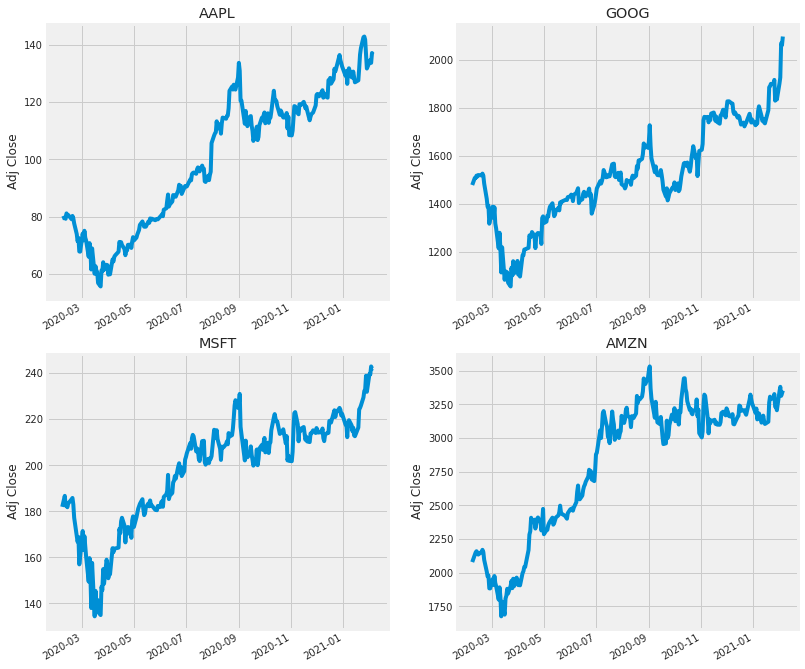

In [7]:
plt.figure(figsize=(12, 8))
plt.subplots_adjust(top = 1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
  plt.subplot(2, 2, i)
  company['Adj Close'].plot()
  plt.ylabel('Adj Close')
  plt.xlabel(None)
  plt.title(f"{tech_list[i-1]}")

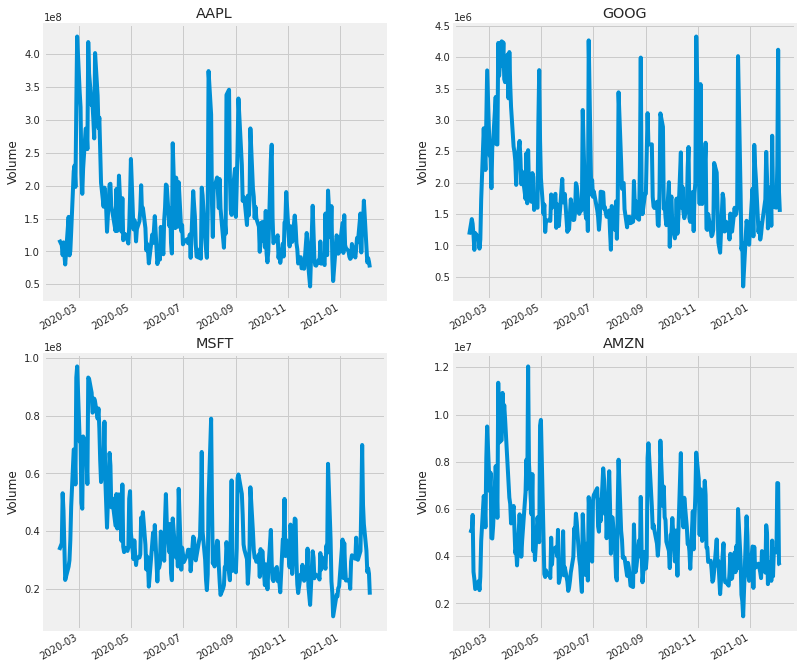

In [8]:
plt.figure(figsize=(12, 8))
plt.subplots_adjust(top = 1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
  plt.subplot(2, 2, i)
  company['Volume'].plot()
  plt.ylabel('Volume')
  plt.xlabel(None)
  plt.title(f"{tech_list[i-1]}")

What was the moving averge of Various stocks ?

In [9]:
ma_day=[10, 20, 50]
for ma in ma_day:
  for company in company_list:
    column_name = f"MA for {ma} days"
    company[column_name] = company['Adj Close'].rolling(ma).mean()

In [10]:
print(GOOG.columns)

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'company_name',
       'MA for 10 days', 'MA for 20 days', 'MA for 50 days'],
      dtype='object')


In [11]:
print(AAPL.columns)

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'company_name',
       'MA for 10 days', 'MA for 20 days', 'MA for 50 days'],
      dtype='object')


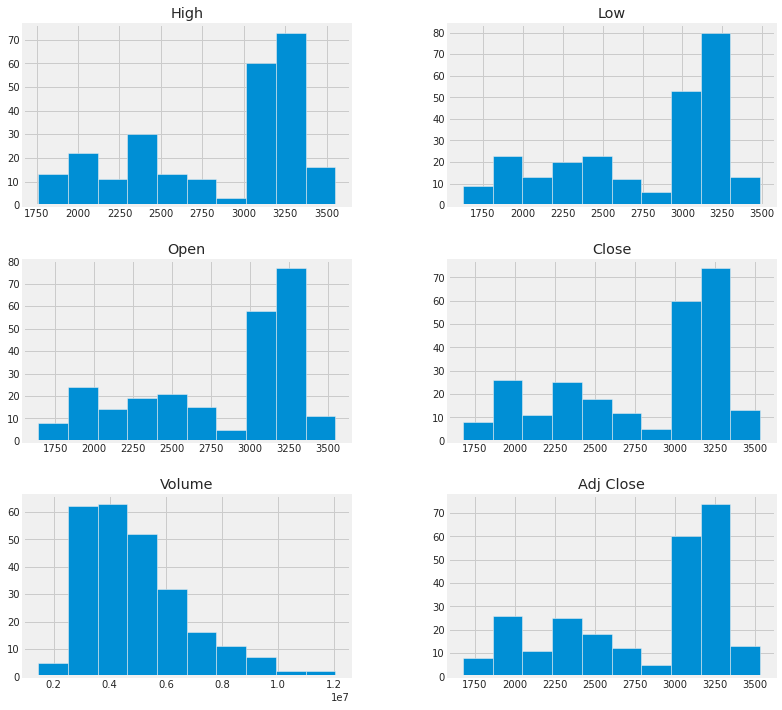

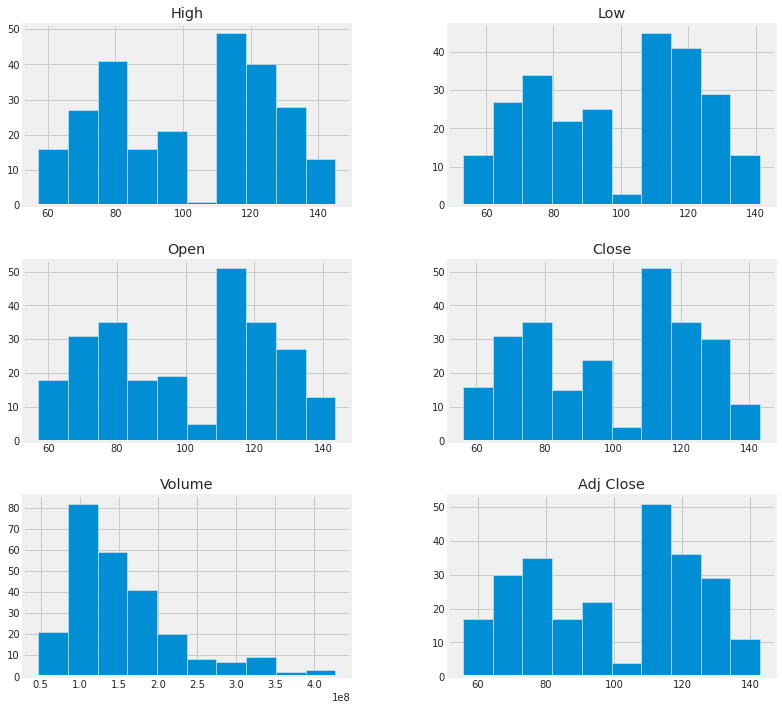

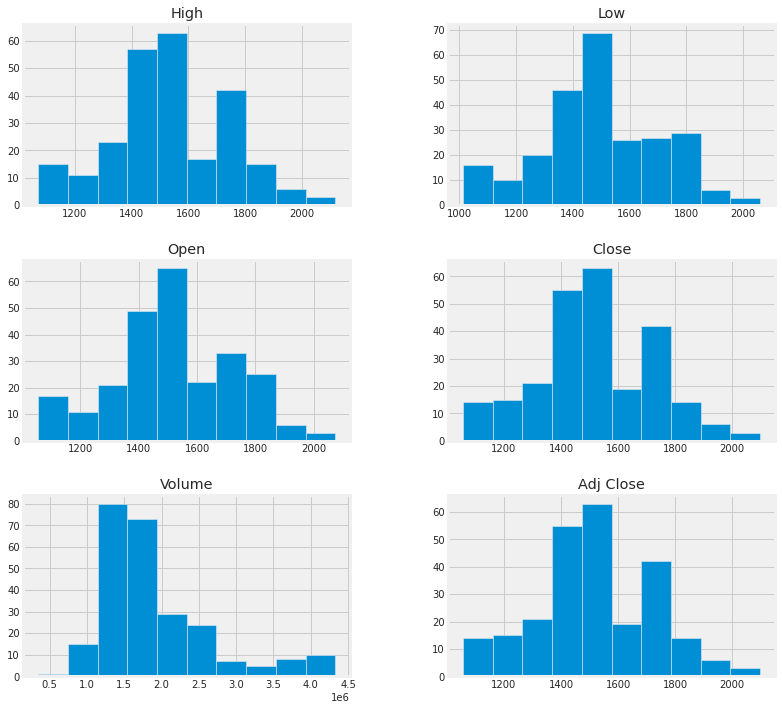

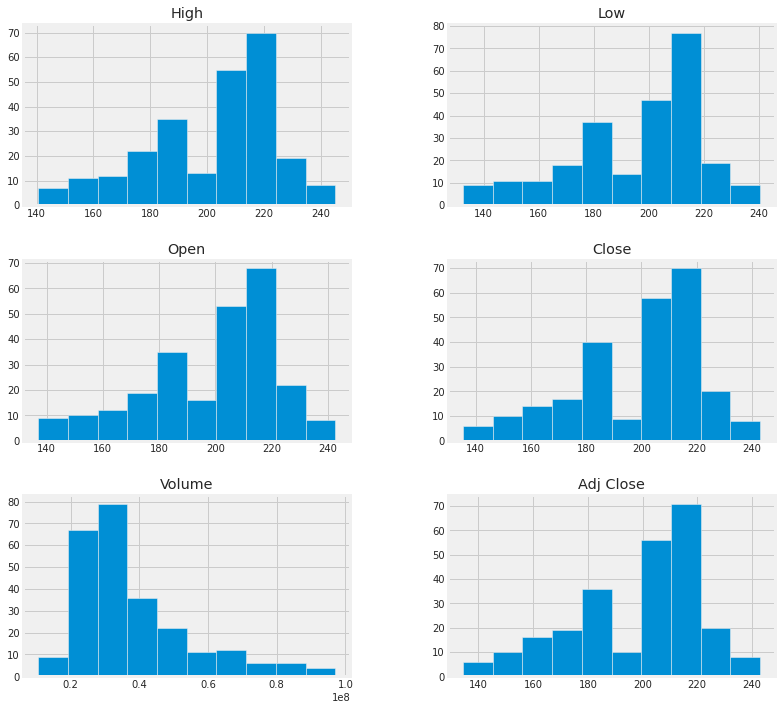

In [12]:
df.groupby("company_name").hist(figsize=(12, 12));

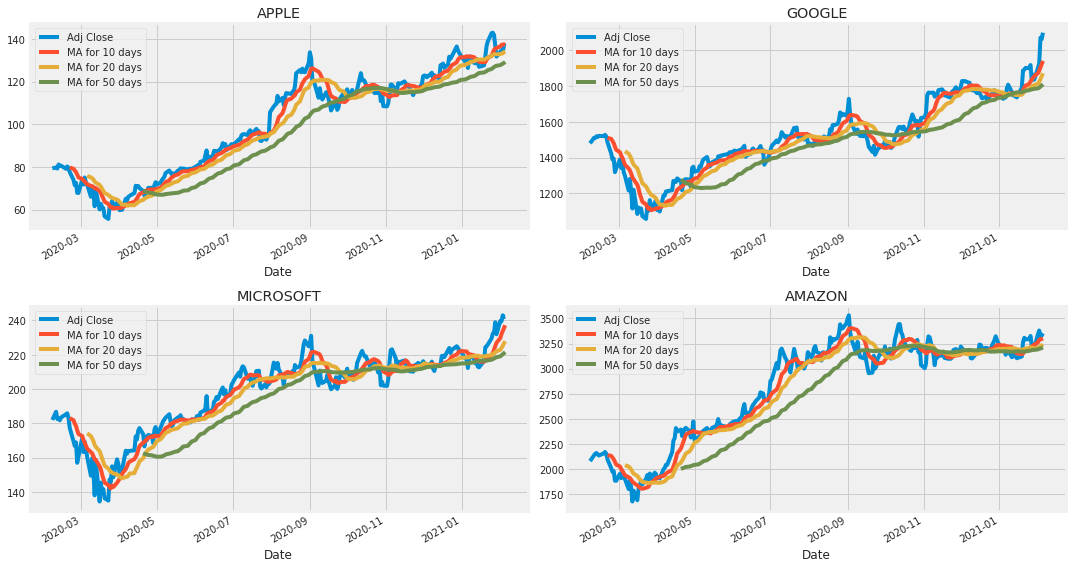

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL[['Adj Close','MA for 10 days',
      'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close','MA for 10 days',
      'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close','MA for 10 days',
      'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close','MA for 10 days',
      'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

3. What was the daily return of the stock on average?

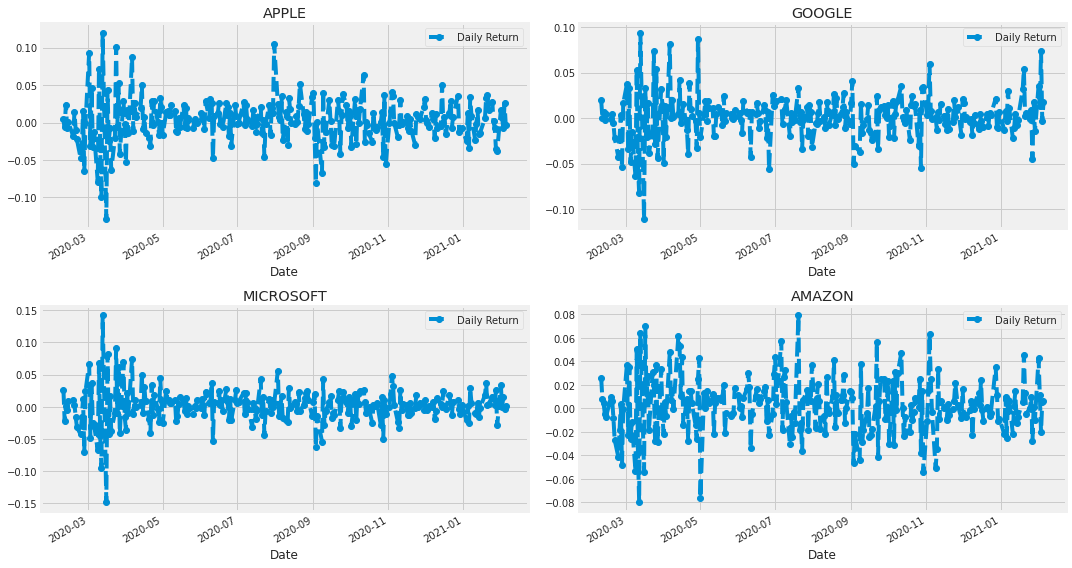

In [14]:
for company in company_list:
  company['Daily Return'] = company['Adj Close'].pct_change()

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--',
                          marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--',
                          marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--',
                          marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--',
                          marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

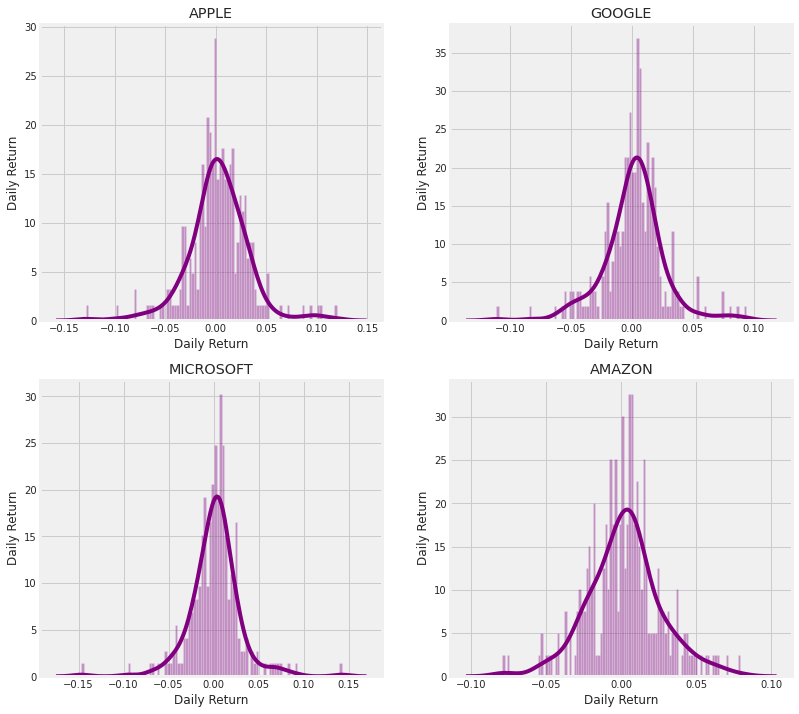

In [15]:
plt.figure(figsize=(12, 12))
for i, company in enumerate(company_list, 1):
  plt.subplot(2,2, i)
  sns.distplot(company['Daily Return'].dropna(), bins=100,
               color='purple')
  plt.ylabel('Daily Return')
  plt.title(f'{company_name[i-1]}')

4 What was the correlation between different stocks closing prices?

In [16]:
closing_df = DataReader(tech_list, 'yahoo', start, end)['Adj Close']
closing_df.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-02-07,79.392090,1479.229980,181.962357,2079.280029
2020-02-10,79.769165,1508.680054,186.721939,2133.909912
2020-02-11,79.287888,1508.790039,182.506607,2150.800049
2020-02-12,81.170799,1518.270020,182.773773,2160.000000
2020-02-13,80.592773,1514.660034,181.784271,2149.870117


In [17]:
tech_rets = closing_df.pct_change()
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-02-07,NaN,NaN,NaN,NaN
2020-02-10,0.004750,0.019909,0.026157,0.026273
2020-02-11,-0.006033,0.000073,-0.022575,0.007915
2020-02-12,0.023748,0.006283,0.001464,0.004277
2020-02-13,-0.007121,-0.002378,-0.005414,-0.004690


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


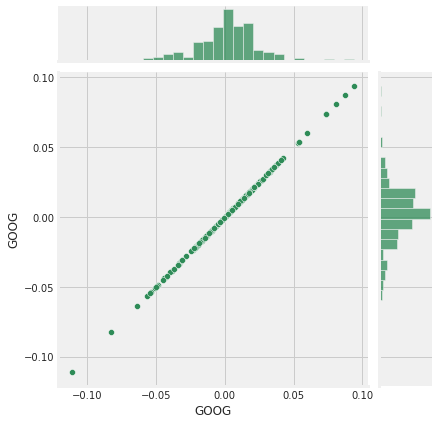

In [18]:
sns.jointplot('GOOG','GOOG', tech_rets, kind='scatter', color='seagreen')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


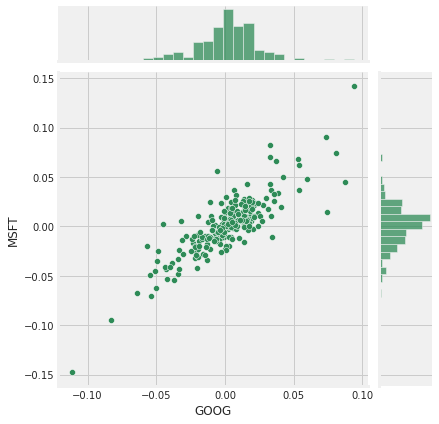

In [19]:
sns.jointplot('GOOG','MSFT', tech_rets, kind='scatter', color='seagreen')

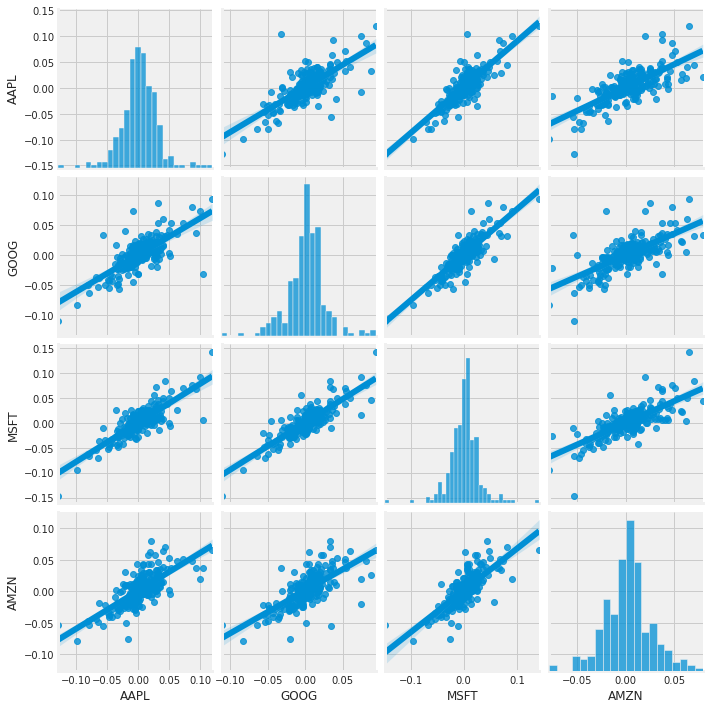

In [20]:
sns.pairplot(tech_rets, kind='reg')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'camp'
  **contour_kws,
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'camp'
  **contour_kws,
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'camp'
  **contour_kws,
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'camp'
  **contour_kws,
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'camp'
  **contour_kws,
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'camp'
  **contour_kws,


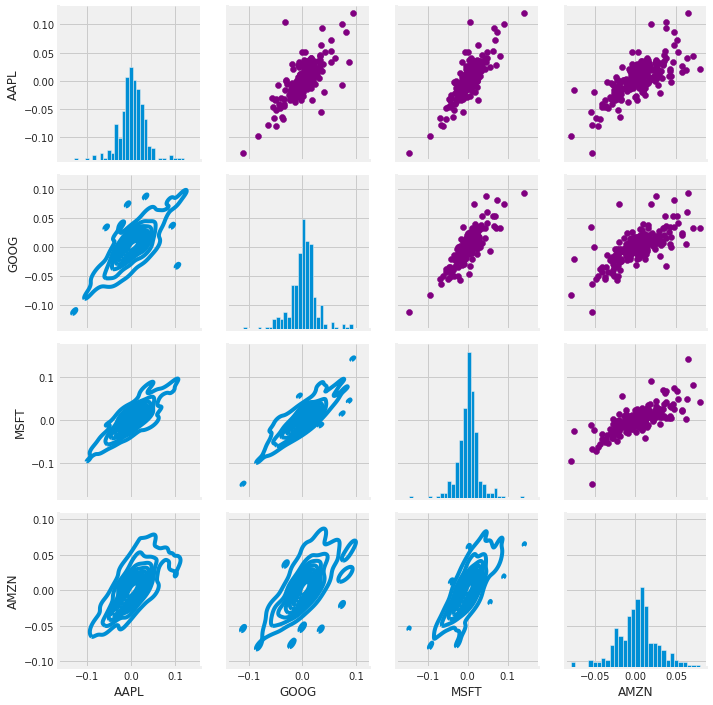

In [21]:
return_fig = sns.PairGrid(tech_rets.dropna())
return_fig.map_upper(plt.scatter, color='purple')
return_fig.map_lower(sns.kdeplot, camp='cool_d')
return_fig.map_diag(plt.hist, bins=30)

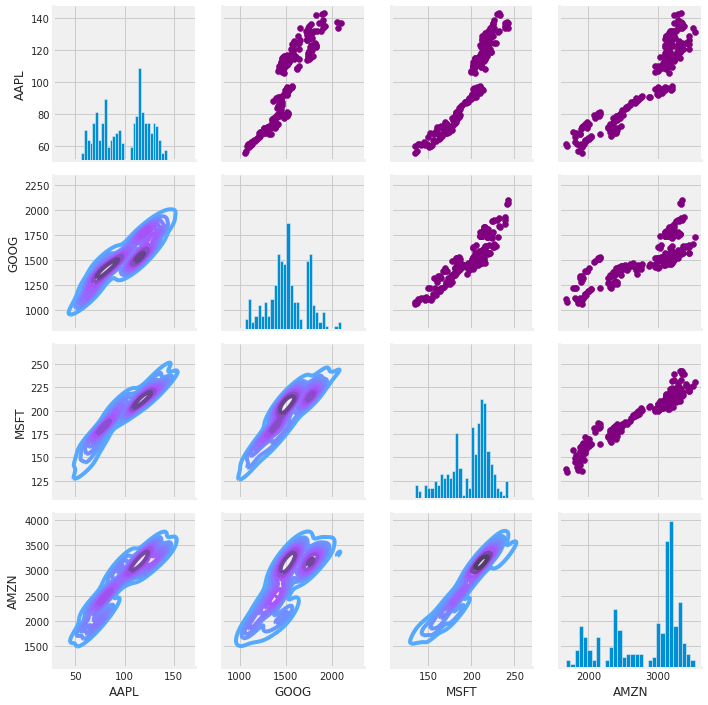

In [22]:
returns_fig = sns.PairGrid(closing_df)
returns_fig.map_upper(plt.scatter, color='purple')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

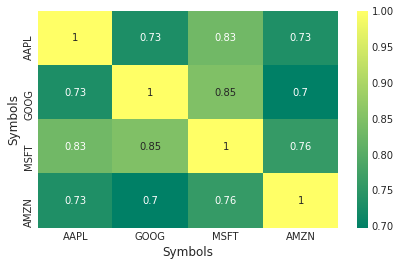

In [23]:
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')

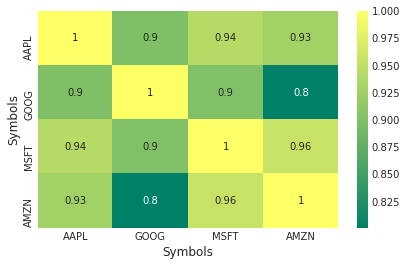

In [24]:
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')

6. Predicting the closing price stock price of APPLE inc:

In [25]:
df = DataReader('AAPL', data_source='yahoo', start='2012-01-01',
                end=datetime.now())
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.650659
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.718646
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.859850
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.994284
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.973674
...,...,...,...,...,...,...
2021-02-01,135.380005,130.929993,133.750000,134.139999,106239800.0,133.939850
2021-02-02,136.309998,134.610001,135.729996,134.990005,83305400.0,134.788589
2021-02-03,135.770004,133.610001,135.759995,133.940002,89880900.0,133.740158


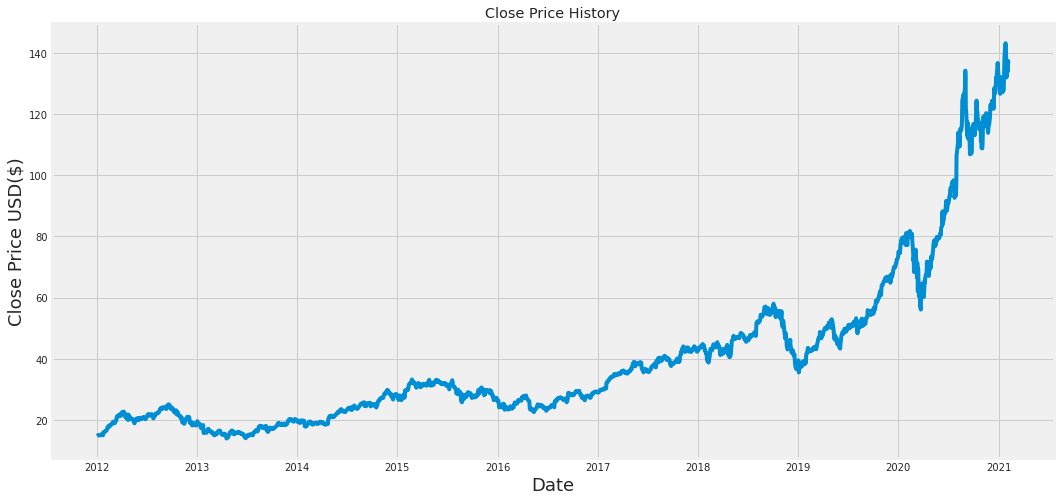

In [26]:
plt.figure(figsize=(16, 8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD($)', fontsize=18)
plt.show()

In [27]:
data = df.filter(['Close'])
dataset = data.values
training_data_len = int(np.ceil(len(dataset)* .8))
training_data_len

1832

In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.00572147],
       [0.00633231],
       [0.00760099],
       ...,
       [0.92864467],
       [0.95534485],
       [0.95046912]])

In [29]:
train_data = scaled_data[0: int(training_data_len),:]
x_train = []
y_train = []
for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i, 0])
  if i<=61:
    print(x_train)
    print(y_train)
    print()

x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1], 1))

[array([0.00572147, 0.00633231, 0.00760099, 0.00880885, 0.00862367,
       0.00904103, 0.00885031, 0.00852969, 0.00809297, 0.00944457,
       0.0106635 , 0.01028759, 0.00822841, 0.01019361, 0.00825882,
       0.01551431, 0.01495322, 0.01568568, 0.01726944, 0.01822855,
       0.01814839, 0.01785265, 0.01911303, 0.02029878, 0.02164209,
       0.02381183, 0.02836966, 0.02843875, 0.03097611, 0.0328722 ,
       0.02961346, 0.03086831, 0.03084343, 0.034362  , 0.03386171,
       0.03478765, 0.03645157, 0.03737752, 0.04004478, 0.04198786,
       0.04254895, 0.0427452 , 0.03942288, 0.03862131, 0.03874017,
       0.04186349, 0.04274244, 0.04463025, 0.04908028, 0.05501734,
       0.05390621, 0.05390897, 0.05820147, 0.05954478, 0.05858842,
       0.05771501, 0.05680565, 0.05982669, 0.0618997 , 0.06276759])]
[0.06062272301844436]

[array([0.00572147, 0.00633231, 0.00760099, 0.00880885, 0.00862367,
       0.00904103, 0.00885031, 0.00852969, 0.00809297, 0.00944457,
       0.0106635 , 0.01028759, 0.00

In [30]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

model = Sequential()
model.add(LSTM(50, return_sequences=True, 
               input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(x_train, y_train, batch_size=1, epochs=10)

Epoch 1/10
1772/1772 [==============================] - 19s 6ms/step - loss: 4.9125e-04
Epoch 2/10
1772/1772 [==============================] - 10s 6ms/step - loss: 9.7958e-05
Epoch 3/10
1772/1772 [==============================] - 11s 6ms/step - loss: 8.2754e-05
Epoch 4/10
1772/1772 [==============================] - 11s 6ms/step - loss: 7.0836e-05
Epoch 5/10
1772/1772 [==============================] - 11s 6ms/step - loss: 5.3875e-05
Epoch 6/10
1772/1772 [==============================] - 11s 6ms/step - loss: 4.0798e-05
Epoch 7/10
1772/1772 [==============================] - 10s 6ms/step - loss: 1.0148e-04
Epoch 8/10
1772/1772 [==============================] - 10s 6ms/step - loss: 4.6502e-05
Epoch 9/10
1772/1772 [==============================] - 11s 6ms/step - loss: 4.2582e-05
Epoch 10/10
1772/1772 [==============================] - 11s 6ms/step - loss: 3.2762e-05


In [31]:
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

4.0848989284035495

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


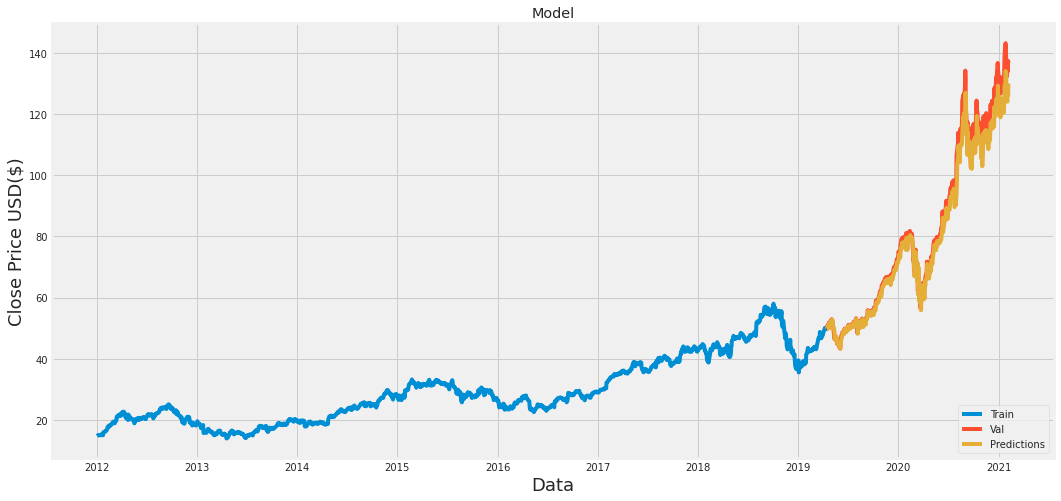

In [32]:
train = data[: training_data_len]
valid = data[training_data_len:]
valid['Predictions']=predictions

plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Data', fontsize=18)
plt.ylabel('Close Price USD($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train','Val','Predictions'], loc='lower right')
plt.show()

In [33]:
valid

,Close,Predictions
Date,,
2019-04-16,49.812500,49.672127
2019-04-17,50.782501,49.670918
2019-04-18,50.965000,50.654030
2019-04-22,51.132500,50.741322
2019-04-23,51.869999,50.936691
...,...,...
2021-02-01,134.139999,124.041267
2021-02-02,134.990005,127.445831
2021-02-03,133.940002,127.028633
